##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
# 데이터 불러오기.
file = '../data/student-mat.csv'
#pd.read_csv(file) => ;로 구분되어있는 것을 확인하고 sep = ;로 지정.

In [3]:
stuDF = pd.read_csv(file, sep=';')

# 컬럼명과 자료형 살펴보기
print('컬럼명 :', stuDF.columns)
print()
print(stuDF.info())

컬럼명 : Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 no

In [4]:
stuDF.corr(numeric_only=True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


[컬럼 이름 분류]
- 학교
- 성별(F= 여성, M = 남성)
- 나이
- 주소
- 가족 크기
- 부모님의 동거 여부
- 어머니 교육수준
- 아버지 교육수준
- 어머니 직업
- 아버지 직업
- reason : 학교 선택 이유
- guardian : 학생의 보호자 (father or mother or other)
- traveltime : 등교 시간
- studytime : 주당 공부시간
- failures : 과거 낙제한 수업의 개수
- extra educational support : 추가적인 교육 지원
- family educational support : 가정의 교육 지원
- extra paid classes within the course subject : 교과목 내의 추가 유급(有給) 수업
- activities : 추가 활동
- nursery : 보육원에 다니다
- higher : 고등교육을 받고 싶음 wants to take higher education
- internet : 집에서의 인터넷 접근성 Internet access at home (binary: yes or no)
- romantic : with a romantic relationship (binary: yes or no)
- famrel : 가족 관계 quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime : 방과후 자유시간 (free time after school (numeric: from 1 - very low to 5 - very high)) => 숫자 클수록 많음.
- goout : 친구와 놀러나가기 (going out with friends (numeric: from 1 - very low to 5 - very high)) => 숫자 클수록 많이 놂.
- Dalc : workday alcohol consumption (numeric: from 1 - very low to 5 - very high) => 숫자가 작을수록 술 적게 마심 good
- Walc : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) => 숫자가 작을수록 술 적게 마심 good
- health : 현재 건강 상태(current health status (numeric: from 1 - very bad to 5 - very good)) => 숫자가 클수록 good
- absences : 결석 횟수 (number of school absences (numeric: from 0 to 93)) => 숫자가 작을수록 good
- G1 : first period grade (numeric: from 0 to 20)
- G2 : second period grade (numeric: from 0 to 20)
- G3 : final grade (numeric: from 0 to 20, output target)

In [5]:
for i in stuDF.columns :
    print(stuDF[i].value_counts())

school
GP    349
MS     46
Name: count, dtype: int64
sex
F    208
M    187
Name: count, dtype: int64
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64
address
U    307
R     88
Name: count, dtype: int64
famsize
GT3    281
LE3    114
Name: count, dtype: int64
Pstatus
T    354
A     41
Name: count, dtype: int64
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64
guardian
mother    273
father     90
other      32
Name: count, dtype: int64
traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64


In [6]:
stuDF_corr = stuDF.corr(numeric_only=True)
abs(stuDF_corr['G3']).sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
Dalc          0.054660
Walc          0.051939
famrel        0.051363
absences      0.034247
freetime      0.011307
Name: G3, dtype: float64

In [7]:
# 데이터 간 상관관계를 corr()로 확인해 보았더니 G1, G2, G3를 제외한 나머지는 상관계수가 높지 않아 데이터를 튜닝(?!) 하기로 결정.
# Yes/No 답안 ==> Y:1, N:0으로 replace
#  : schoolsup 추가교육(보충수업?) / famsup 가족 교육 지원 / paid 수학 공부 추가 지원 여부
#  : activities 과외 활동 nursery 보육원 higher 고등교육 희망 유무 internet 인터넷 접속 romantic 이성교제
#  : traveltime 이동 시간(15분 이상 Y)

# 점수가 높을수록 긍정적.
#  :  studytime 학습 시간 -> 1 ~ 4 (높을 수록 많음.) 
#  : Medu 어머니의 교육, Fedu 아버지의 교육 -> 0~ 4 (숫자가 클수록 높음.)
#  :  health 현재 건강 상태 (1 ~ 5) famrel 가족관계 -> (1~5) freetime 자유시간 -> (1~5) goout 외출 -> (1~5)
    # * Medu / Fedu --> 점수 범위 1~5로 변경

# 점수가 높을수록 악영향
#  : Dalc 일과 중 음주(1~5) Walc 주말 음주(1~5) absences 결석 횟수(1~93) failures 낙제 횟수 -> 1~4 (1,2,3 아니면 4)
    # * absences 결석 횟수 
    # * Dalc, Walc, failures 점수 반대로 뒤집기..(안좋을수록 낮은 점수.)

In [8]:
# 데이터 전처리

stuDF = stuDF.replace({'yes':1, 'no':0})

In [9]:
# # Medu/Fedu 점수 범위 변경
# stuDF['Medu'] = stuDF['Medu'].replace({0:1, 1:2, 2:3, 3:4, 4:5})
# stuDF['Fedu'] = stuDF['Fedu'].replace({0:1, 1:2, 2:3, 3:4, 4:5})

# # 점수가 높을수록 부정적인 컬럼 점수 뒤집기
# stuDF['Dalc'] = stuDF['Dalc'].replace({1:5, 2:4, 3:3, 4:2, 5:1})
# stuDF['Walc'] = stuDF['Walc'].replace({1:5, 2:4, 3:3, 4:2, 5:1})
# stuDF['failures'] = stuDF['failures'].replace({1:4, 2:3, 3:2, 4:1})

In [10]:
stuDF.corr(numeric_only=True)

# 점수의 범위를 replace 해보았지만 여전히 값 차이가 너무 커서인지 상관계수가 오르지 않았다.
# 생각해보니 점수가 반대로 되어있으면 반비례 관계가 형성될 수 있다는 사실을 알게 되었다. :(


,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,-0.251811,-0.140609,-0.035933,-0.103063,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.036029,0.183727,0.159700,0.108277,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,0.037530,0.185496,0.086981,0.112643,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.009246,-0.003286,-0.066420,-0.007766,...,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.037763,0.145228,0.167220,0.089877,...,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.000437,-0.055075,-0.188039,-0.069341,...,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
schoolsup,-0.251811,-0.036029,0.037530,-0.009246,0.037763,-0.000437,1.000000,0.104681,-0.020753,0.046032,...,-0.001345,-0.045465,-0.037698,-0.021485,-0.087152,-0.034124,0.022526,-0.212607,-0.117385,-0.082788
famsup,-0.140609,0.183727,0.185496,-0.003286,0.145228,-0.055075,0.104681,1.000000,0.293184,-0.001500,...,-0.020436,0.010538,-0.015631,-0.031575,-0.086688,0.029297,0.024353,-0.084569,-0.059166,-0.039157
paid,-0.035933,0.159700,0.086981,-0.066420,0.167220,-0.188039,-0.020753,0.293184,1.000000,-0.021382,...,0.000460,-0.064253,0.010493,0.062465,0.060454,-0.078132,0.007435,0.039079,0.105198,0.101996
activities,-0.103063,0.108277,0.112643,-0.007766,0.089877,-0.069341,0.046032,-0.001500,-0.021382,1.000000,...,0.040687,0.089728,0.046088,-0.066508,-0.037477,0.023923,-0.013610,0.057010,0.050552,0.016100


In [11]:
def print_feature(nrows, ncols, df, target, features, corrs) : 
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target], df[features[idx]], label =f'corr : {corrs[idx]:.2}')
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend()
    plt.tight_layout() # 간격 안 맞는 거 맞춰주는 건가..?
    plt.show()

In [12]:
abs(stuDF.corr(numeric_only=True)['G3']).sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
higher        0.182465
age           0.161579
Fedu          0.152457
goout         0.132791
romantic      0.129970
traveltime    0.117142
paid          0.101996
internet      0.098483
studytime     0.097820
schoolsup     0.082788
health        0.061335
Dalc          0.054660
Walc          0.051939
nursery       0.051568
famrel        0.051363
famsup        0.039157
absences      0.034247
activities    0.016100
freetime      0.011307
Name: G3, dtype: float64

In [13]:
# 부모님의 교육 수준을 하나의 컬럼으로 합치고 Walc와 Dalc를 합쳐서 값이 오르는지 확인 => 거의 오르지 않았다 
stuDF['pedu'] = stuDF['Medu'] + stuDF['Fedu']
stuDF['alc'] = stuDF['Dalc'] + stuDF['Walc']
abs(stuDF.corr(numeric_only=True)['G3']).sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
pedu          0.205224
higher        0.182465
age           0.161579
Fedu          0.152457
goout         0.132791
romantic      0.129970
traveltime    0.117142
paid          0.101996
internet      0.098483
studytime     0.097820
schoolsup     0.082788
health        0.061335
alc           0.058245
Dalc          0.054660
Walc          0.051939
nursery       0.051568
famrel        0.051363
famsup        0.039157
absences      0.034247
activities    0.016100
freetime      0.011307
Name: G3, dtype: float64

<Axes: >

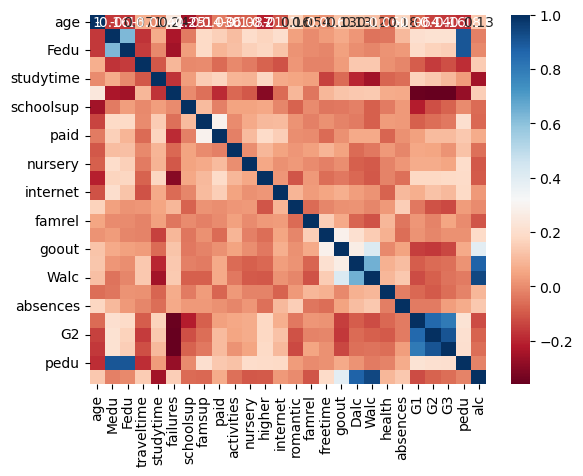

In [28]:
import seaborn as sns
sns.heatmap(stuDF.corr(numeric_only=True), annot=True, cmap='RdBu')

In [14]:
featureDF = stuDF[['G2', 'G1', 'failures', 'Medu', 'higher']]
targetSR = stuDF['G3']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2)

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
std = StandardScaler()
std.fit(X_train)
std_scaled_Xtrain= std.transform(X_train)
std_scaled_Xtest = std.transform(X_test)

minmax = MinMaxScaler()
minmax.fit(X_train)
mm_scaled_Xtrain = minmax.transform(X_train)
mm_scaled_Xtest = minmax.transform(X_test)

rb = RobustScaler()
rb.fit(X_train)
rb_scaled_Xtrain = rb.transform(X_train)
rb_scaled_Xtest = rb.transform(X_test)

In [25]:
model = LinearRegression()
model.fit(std_scaled_Xtrain, y_train)
model.score(X_test, y_test)
model.score(std_scaled_Xtest, y_test)


c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.8656305109970494

In [26]:
# 성능 평가

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # 모델의 성능을 평가할 떄 사용함
import numpy as np

y_pre = model.predict(std_scaled_Xtest) # 예측값 계산

y_pre = np.round(y_pre, 1)

print('[성능평가]')
print()

# 1) MSE
print('1) 평균제곱오차:', mean_squared_error(y_test, y_pre))

# 2) MAE
print('2) 평균절대오차:', mean_absolute_error(y_test, y_pre))

# 3) R2
r2_scores = r2_score(y_test, y_pre)
print('3) 루트제곱오차:', r2_scores)

# 4) RMSE
rmse = mean_squared_error(y_test, y_pre, squared=False)
print('4) 평균제곱근오차:', rmse)

[성능평가]

1) 평균제곱오차: 2.8096202531645575
2) 평균절대오차: 1.0151898734177214
3) 루트제곱오차: 0.8650647171989226
4) 평균제곱근오차: 1.6761921886122002


문제 : 
- 상관계수가 너무 낮아서 각 컬럼을 더해서 새 컬럼을 만들어 보았지만 결국 상관계수 값을 올릴 수는 없었다.
- 점수가 높게 나오는데 중간에 어디서 데이터를 잘못 입력한 것 같다.

- 분류로 보는게 더 나을 지도...;;